In [1]:
%%  https://ja.wikipedia.org/wiki/%E3%82%AC%E3%82%A6%E3%82%B9%E3%83%BB%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%88%E3%83%B3%E6%B3%95
% http://org-technology.com/posts/gauss-newton-method.html

%% get data
clear all;
close all;
% data for fitting
xhat = [0.038, 0.194, 0.425, 0.626, 1.253, 2.500, 3.740].';
yhat = [0.050, 0.127, 0.094, 0.2122, 0.2729, 0.2665, 0.3317].';


In [2]:
%% making evaluate funciton
syms a b x y

% evaluate fuction
func = a*x/(x+b);
R = y - func;
S = R^2;

% partial derivative
Ra = diff(R,a);
Rb = diff(R,b);

% make jacobian matrix
Ja = subs(Ra,{x,y},{xhat,yhat});
% subs(fa,[x,y],[xhat,yhat]); ではダメ
Jb = subs(Rb,{x,y},{xhat,yhat});

Jacob = [Ja,Jb]; % jacobian


In [3]:
%% initial value
vinit = [0.9;0.2];
v = vinit;
iteration = 10;
vsave = zeros(2,iteration);

% lambda
lambda = 1;
I = eye(size(Jacob,2));
% evaluate function
SumOfError = zeros(iteration,1);
SEF = subs(S,{x,y},{xhat,yhat});


%% iterative optimization
% error function
r = subs(R,{x,y},{xhat,yhat});

for i = 1:iteration
    % saving current value 
    vsave(:,i) = v;
   % get error
   SOE = double(subs(SEF,[a,b],v'));
   SumOfError(i) = SOE.' * SOE;
    % jacobian
    J = double(subs(Jacob,[a,b],v'));
   df = double(subs(r,[a,b],v'));
   delta = - ( J.' * J  + lambda * I)\J.' *  df;
   v = v + delta;
end



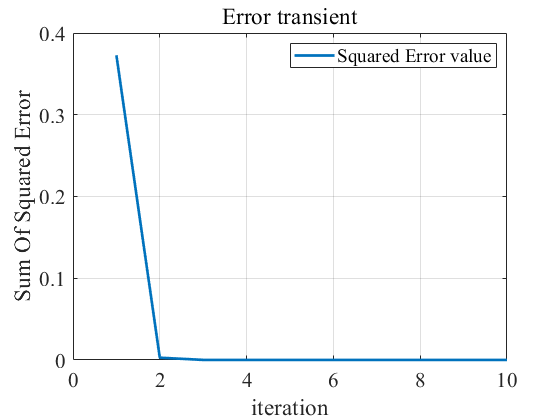

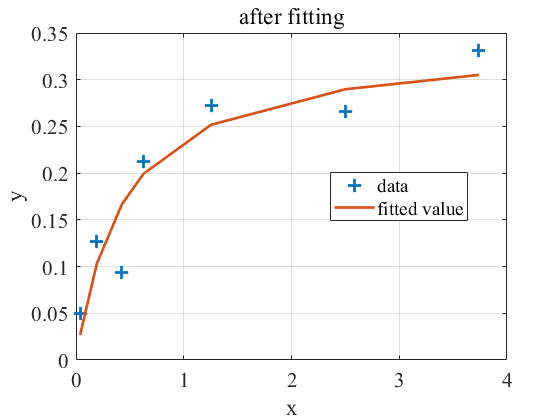

In [4]:
%% showing
fit = subs(func,x,xhat);
yfit = double( subs(fit,[a,b],v') );

figure(3);
plot(xhat,yhat,'+',xhat,yfit);
xlabel('x');
ylabel('y');
legend('data','fitted value','Location','Best');
grid on;
title('after fitting')

figure(4);
plot(SumOfError);
xlabel('iteration');
ylabel('Sum Of Squared Error');
legend('Squared Error value')
grid on;
title('Error transient')


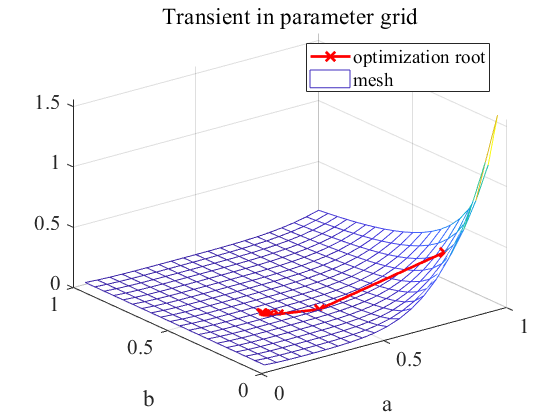

In [5]:
%% mapping
Ms = 20;
Map = zeros(Ms);
% evaluate function
SEF = subs(S,{x,y},{xhat,yhat});
A = ndgrid(1:Ms,1:Ms)/Ms;
B = A.';


for i = 1:Ms
    for j = 1:Ms
        v = [i/Ms;j/Ms];
       SOE = double(subs(SEF,[a,b],v'));
       Map(i,j) = SOE.' * SOE;
    end
end

%% showing
figure(5);
plot3(vsave(1,:),vsave(2,:),SumOfError(:),'r-x')
hold on;
mesh(A,B,Map);
legend('optimization root','mesh','Location','best')
xlabel('a');
ylabel('b');
grid on;
hold off;
title('Transient in parameter grid')